In [63]:
from matplotlib import pyplot
import cv2
import imagehash
import os
from PIL import Image

path = '/home/strider/Code/robotron/resources/images/'
spriteDefFile = open(path+'robotronsprites.txt', 'r')
spriteClasses = open(path+'robotronclasses.txt', 'r')
spriteSheet = cv2.imread(path+"robotronsprites.jpg")
ssh, ssw, _ = spriteSheet.shape
print(ssw, ssh)
x = 0
y = 0

classes = {}
for line in spriteClasses:
    (name, classname) = line.split()
    classes[classname] = name
    
sprites = {}
spriteClasses = {}
rowheight = 0
i = 0
print("Name, Class, Width, Height, x, y")
for line in spriteDefFile:
    i += 1
    (name, c, sid, w, h, _) = line.split()
    w = int(w) * 4
    h = int(h) * 2
    if x + w > ssw:
        x = 0
        y += rowheight + 10
        rowheight = 0
    print(name, classes[c], w, h, x, y)
    sprite = spriteSheet[y:y+h, x:x+w]
    sprites[name] = sprite[:,:,::-1]
    spriteClasses[name] = c
    x += w + 10
    if h > rowheight:
        rowheight = h
        


608 512
Name, Class, Width, Height, x, y
familydeath nothing 24 22 0 0
1000 nothing 24 10 34 0
2000 nothing 24 10 68 0
3000 nothing 24 10 102 0
4000 nothing 24 10 136 0
5000 nothing 24 10 170 0
mommy1 civilian 16 28 204 0
mommy2 civilian 16 28 230 0
mommy3 civilian 16 28 256 0
mommy4 civilian 16 28 282 0
mommy5 civilian 16 28 308 0
mommy6 civilian 16 28 334 0
mommy7 civilian 16 28 360 0
mommy8 civilian 16 28 386 0
mommy9 civilian 16 28 412 0
mommy10 civilian 16 28 438 0
mommy11 civilian 16 28 464 0
mommy12 civilian 16 28 490 0
daddy1 civilian 20 26 516 0
daddy2 civilian 20 26 546 0
daddy3 civilian 20 26 576 0
daddy4 civilian 20 26 0 38
daddy5 civilian 20 26 30 38
daddy6 civilian 20 26 60 38
daddy7 civilian 20 26 90 38
daddy8 civilian 20 26 120 38
daddy9 civilian 20 26 150 38
daddy10 civilian 20 26 180 38
daddy11 civilian 20 26 210 38
daddy12 civilian 20 26 240 38
mikey1 civilian 12 22 270 38
mikey2 civilian 12 22 292 38
mikey3 civilian 12 22 314 38
mikey4 civilian 12 22 336 38
mikey5 c

In [2]:
def hasher(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (20, 20))
    _, img = cv2.threshold(img,16,255,0)
    
    return imagehash.average_hash(Image.fromarray(img))

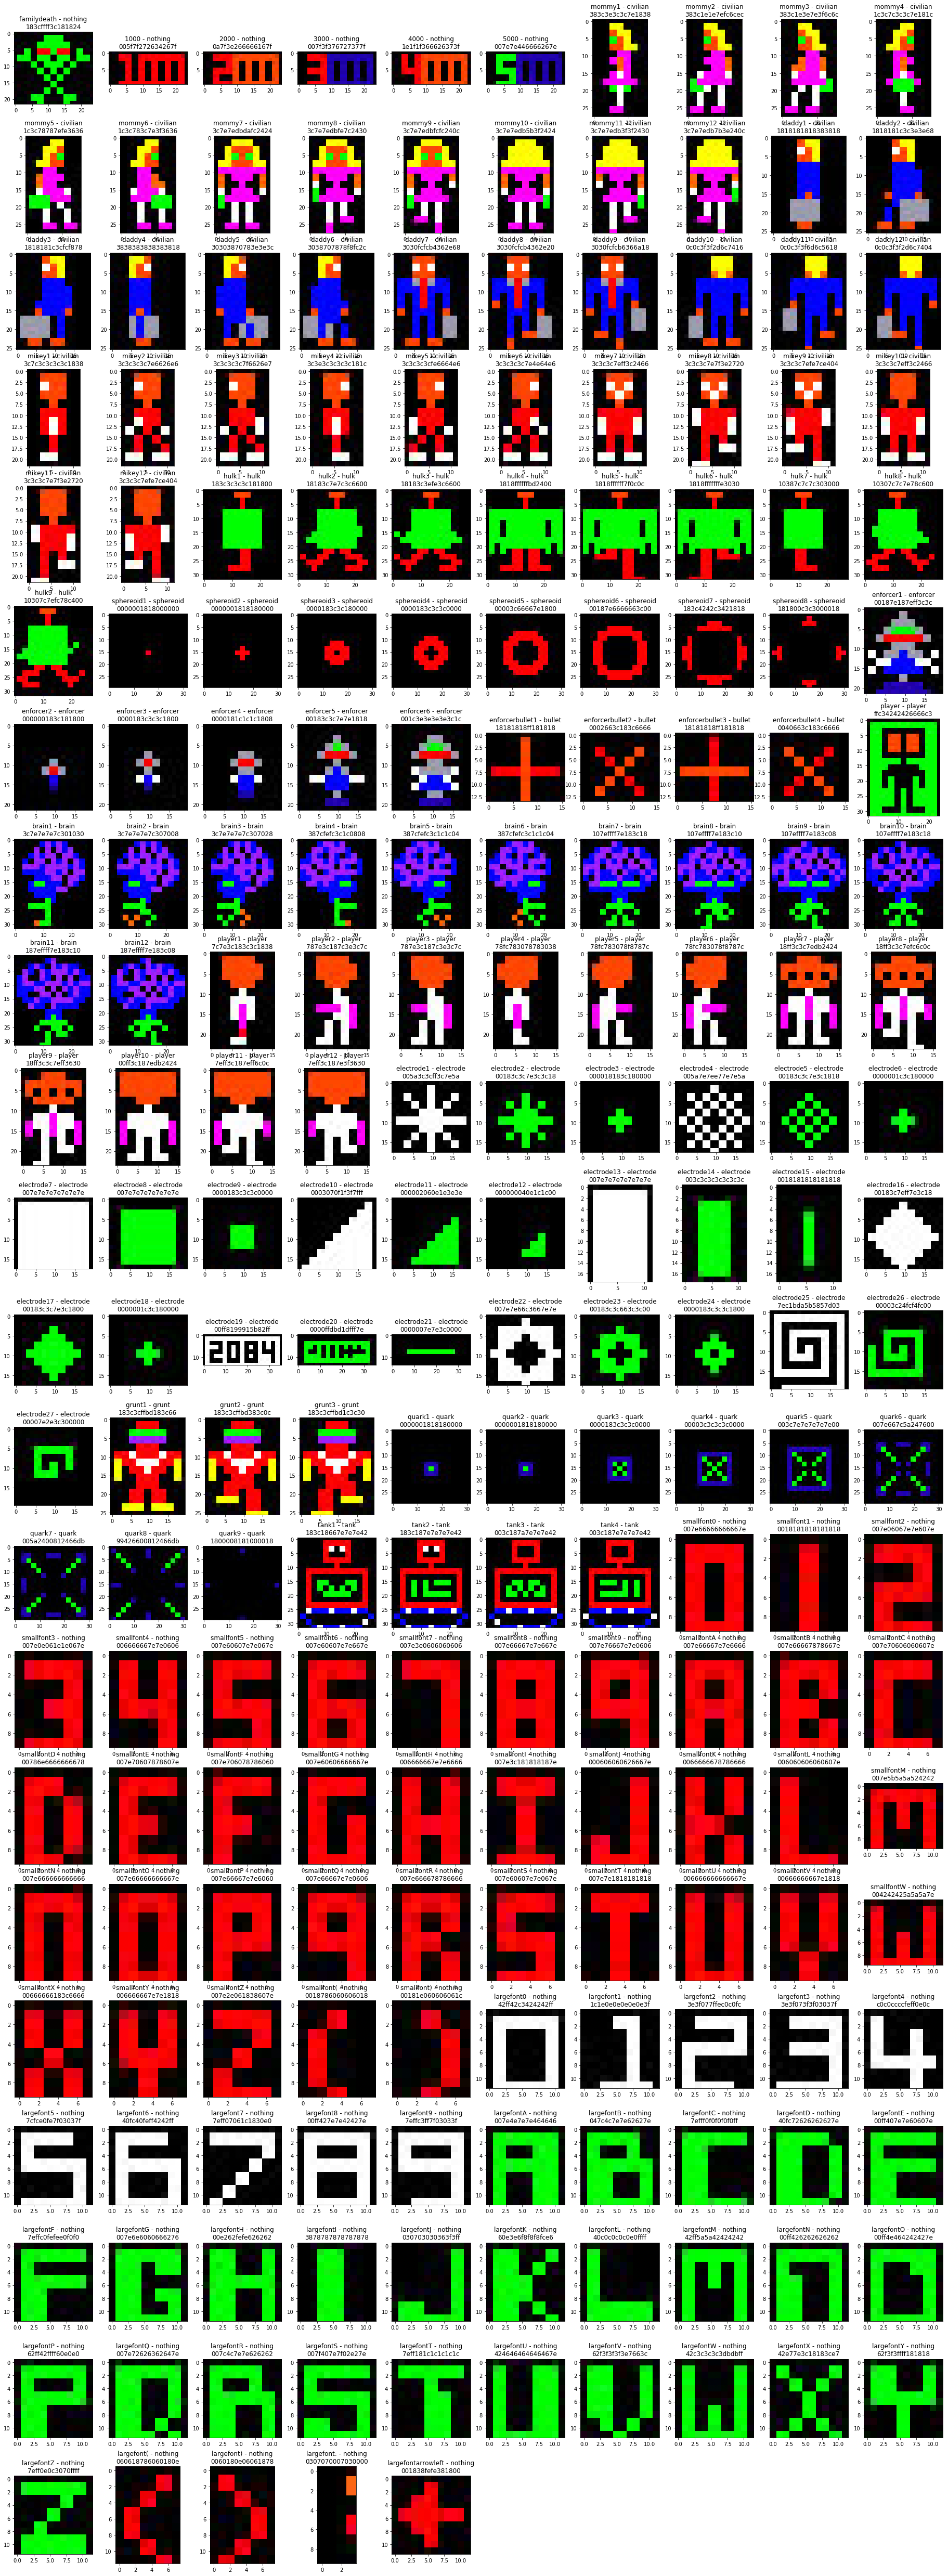

In [3]:
import os
fig=pyplot.figure(figsize=(32, 90))
i = 0
r = 10
c = int(len(sprites) / 10) + 1

path = '/home/strider/Code/robotron/resources/images/sprites/'
for name in sprites.keys():
    sprite = sprites[name]
    sClass = classes[spriteClasses[name]]
    i += 1
    subplot = fig.add_subplot(c, r, i)
    sHash = hasher(sprite)
    pyplot.imshow(sprite)
    subplot.set_title("{} - {}\n{}".format(name, sClass, sHash))
    
#     if not os.path.isdir(path+sClass):
#         os.mkdir(path+sClass)
#     cv2.imwrite('{}{}/{}.png'.format(path, sClass, sHash), sprite)
    

In [4]:
classes

{'0': 'nothing',
 '1': 'player',
 '2': 'civilian',
 '3': 'grunt',
 '4': 'hulk',
 '5': 'sphereoid',
 '6': 'enforcer',
 '7': 'brain',
 '8': 'tank',
 '9': 'quark',
 '10': 'electrode',
 '11': 'bullet'}

In [5]:
for name in sprites.keys():
    print(name)

familydeath
1000
2000
3000
4000
5000
mommy1
mommy2
mommy3
mommy4
mommy5
mommy6
mommy7
mommy8
mommy9
mommy10
mommy11
mommy12
daddy1
daddy2
daddy3
daddy4
daddy5
daddy6
daddy7
daddy8
daddy9
daddy10
daddy11
daddy12
mikey1
mikey2
mikey3
mikey4
mikey5
mikey6
mikey7
mikey8
mikey9
mikey10
mikey11
mikey12
hulk1
hulk2
hulk3
hulk4
hulk5
hulk6
hulk7
hulk8
hulk9
sphereoid1
sphereoid2
sphereoid3
sphereoid4
sphereoid5
sphereoid6
sphereoid7
sphereoid8
enforcer1
enforcer2
enforcer3
enforcer4
enforcer5
enforcer6
enforcerbullet1
enforcerbullet2
enforcerbullet3
enforcerbullet4
player
brain1
brain2
brain3
brain4
brain5
brain6
brain7
brain8
brain9
brain10
brain11
brain12
player1
player2
player3
player4
player5
player6
player7
player8
player9
player10
player11
player12
electrode1
electrode2
electrode3
electrode4
electrode5
electrode6
electrode7
electrode8
electrode9
electrode10
electrode11
electrode12
electrode13
electrode14
electrode15
electrode16
electrode17
electrode18
electrode19
electrode20
electrode21


In [6]:
spriteClasses

{'familydeath': '0',
 '1000': '0',
 '2000': '0',
 '3000': '0',
 '4000': '0',
 '5000': '0',
 'mommy1': '2',
 'mommy2': '2',
 'mommy3': '2',
 'mommy4': '2',
 'mommy5': '2',
 'mommy6': '2',
 'mommy7': '2',
 'mommy8': '2',
 'mommy9': '2',
 'mommy10': '2',
 'mommy11': '2',
 'mommy12': '2',
 'daddy1': '2',
 'daddy2': '2',
 'daddy3': '2',
 'daddy4': '2',
 'daddy5': '2',
 'daddy6': '2',
 'daddy7': '2',
 'daddy8': '2',
 'daddy9': '2',
 'daddy10': '2',
 'daddy11': '2',
 'daddy12': '2',
 'mikey1': '2',
 'mikey2': '2',
 'mikey3': '2',
 'mikey4': '2',
 'mikey5': '2',
 'mikey6': '2',
 'mikey7': '2',
 'mikey8': '2',
 'mikey9': '2',
 'mikey10': '2',
 'mikey11': '2',
 'mikey12': '2',
 'hulk1': '4',
 'hulk2': '4',
 'hulk3': '4',
 'hulk4': '4',
 'hulk5': '4',
 'hulk6': '4',
 'hulk7': '4',
 'hulk8': '4',
 'hulk9': '4',
 'sphereoid1': '5',
 'sphereoid2': '5',
 'sphereoid3': '5',
 'sphereoid4': '5',
 'sphereoid5': '5',
 'sphereoid6': '5',
 'sphereoid7': '5',
 'sphereoid8': '5',
 'enforcer1': '6',
 'enforcer

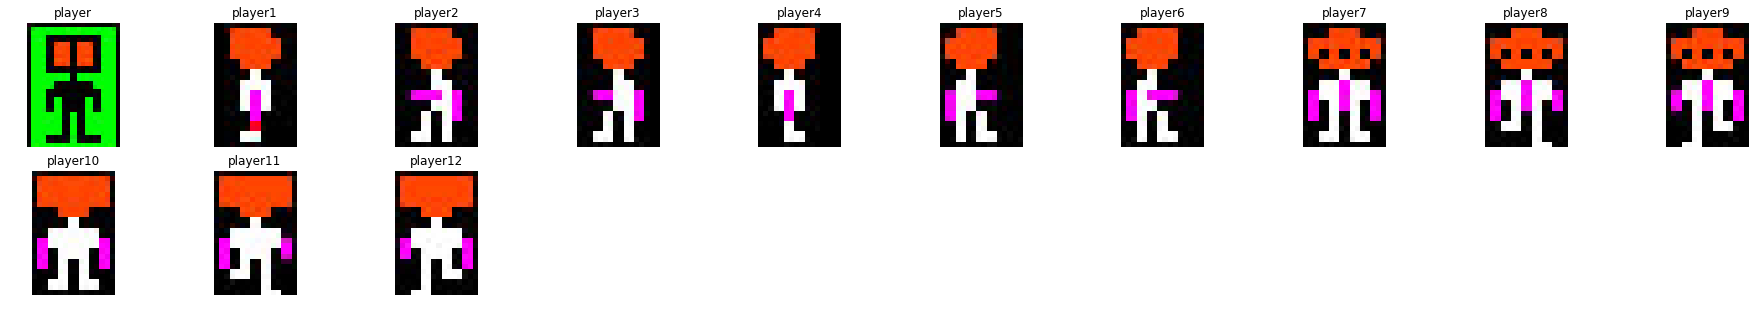

In [90]:
k = 1
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 5))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

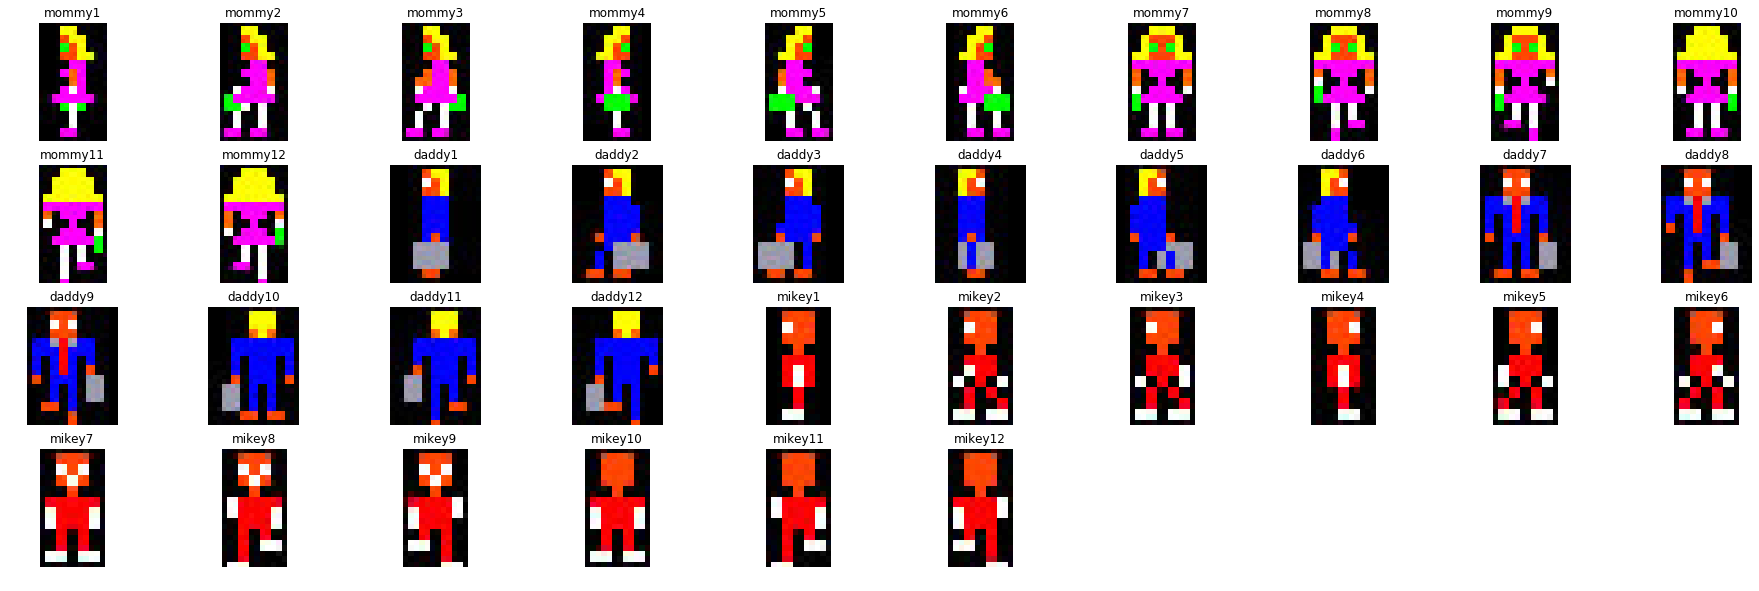

In [91]:
k = 2
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 10))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

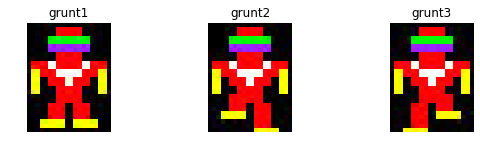

In [89]:
k = 3
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

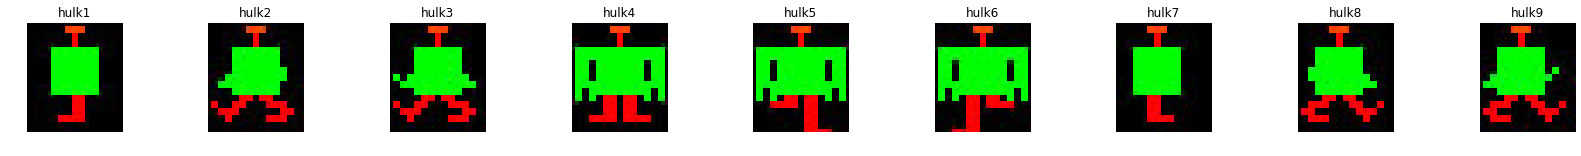

In [92]:
k = 4
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

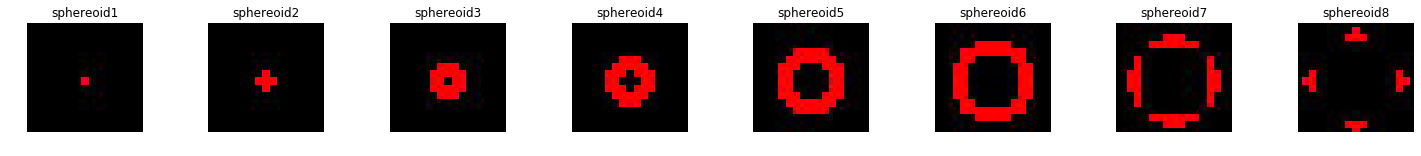

In [93]:
k = 5
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

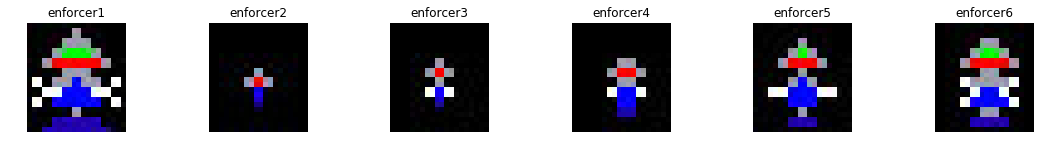

In [94]:
k = 6
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

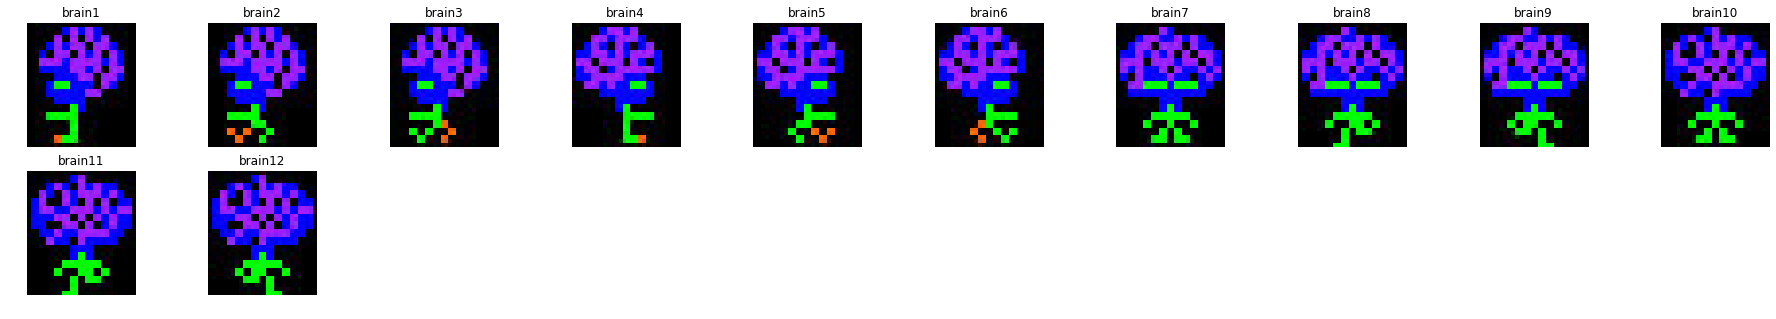

In [96]:
k = 7
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 5))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

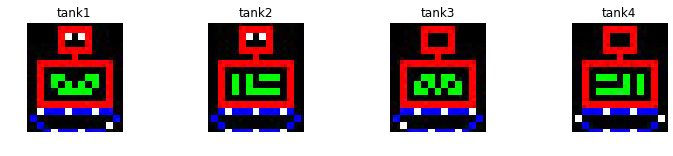

In [97]:
k = 8
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

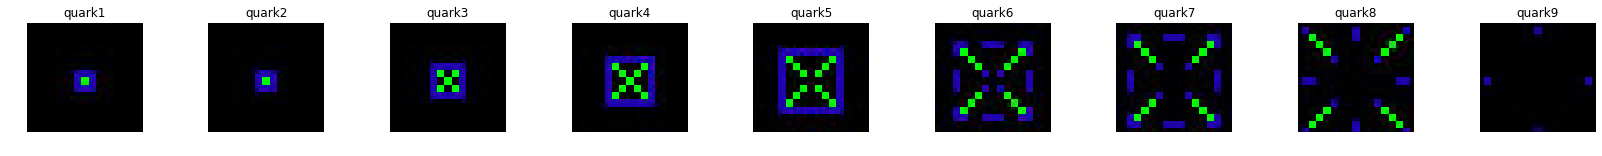

In [98]:
k = 9
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

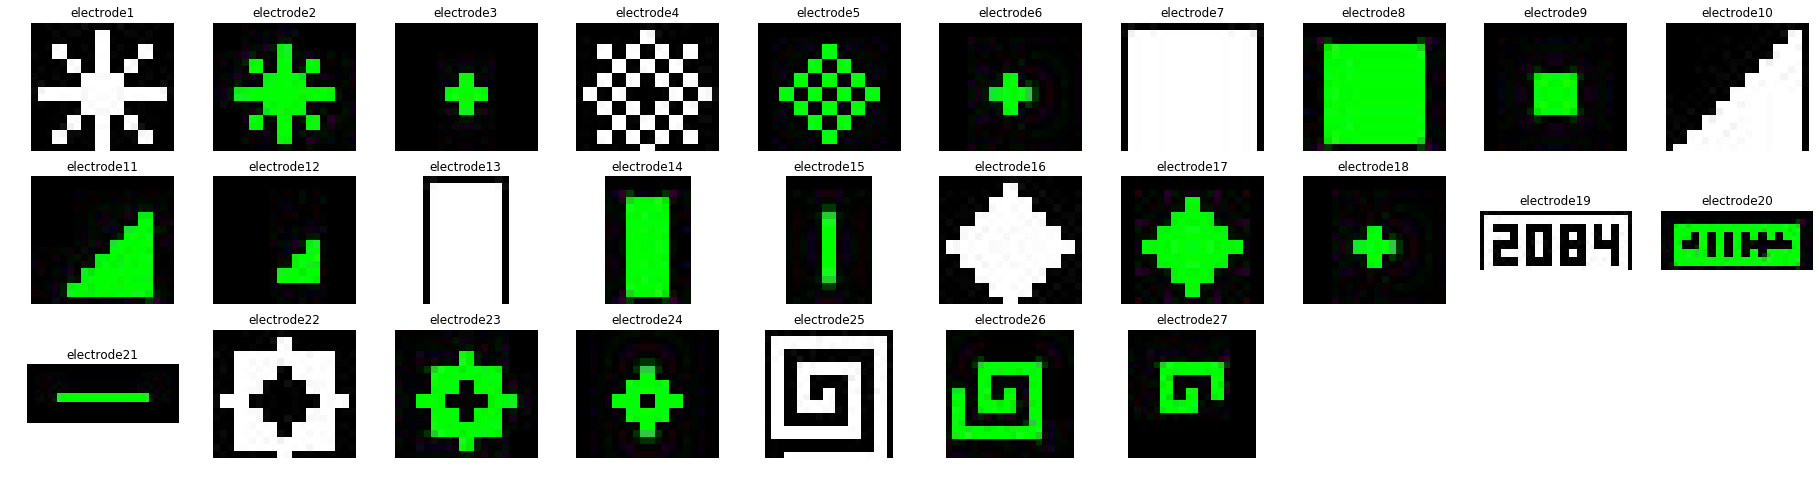

In [100]:
k = 10
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 8))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

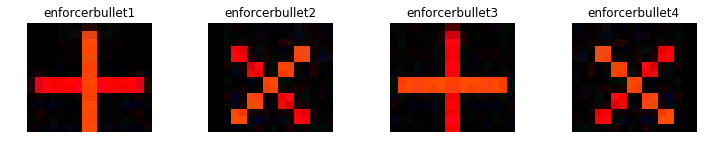

In [101]:
k = 11
s = [s for s in spriteClasses if int(spriteClasses[s]) == k ]
fig=pyplot.figure(figsize=(32, 2))
i = 0
r = 10
c = int(len(s) / 10) + 1
for sprite in s:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprites[sprite])
    subplot.set_title(sprite)
    subplot.axis('off')

In [102]:
print(classes)

{'0': 'nothing', '1': 'player', '2': 'civilian', '3': 'grunt', '4': 'hulk', '5': 'sphereoid', '6': 'enforcer', '7': 'brain', '8': 'tank', '9': 'quark', '10': 'electrode', '11': 'bullet'}
